## Machine Learning in Agriculture:

### Problem Staement:

The Toxic Pesticides

Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

You need to daetermine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

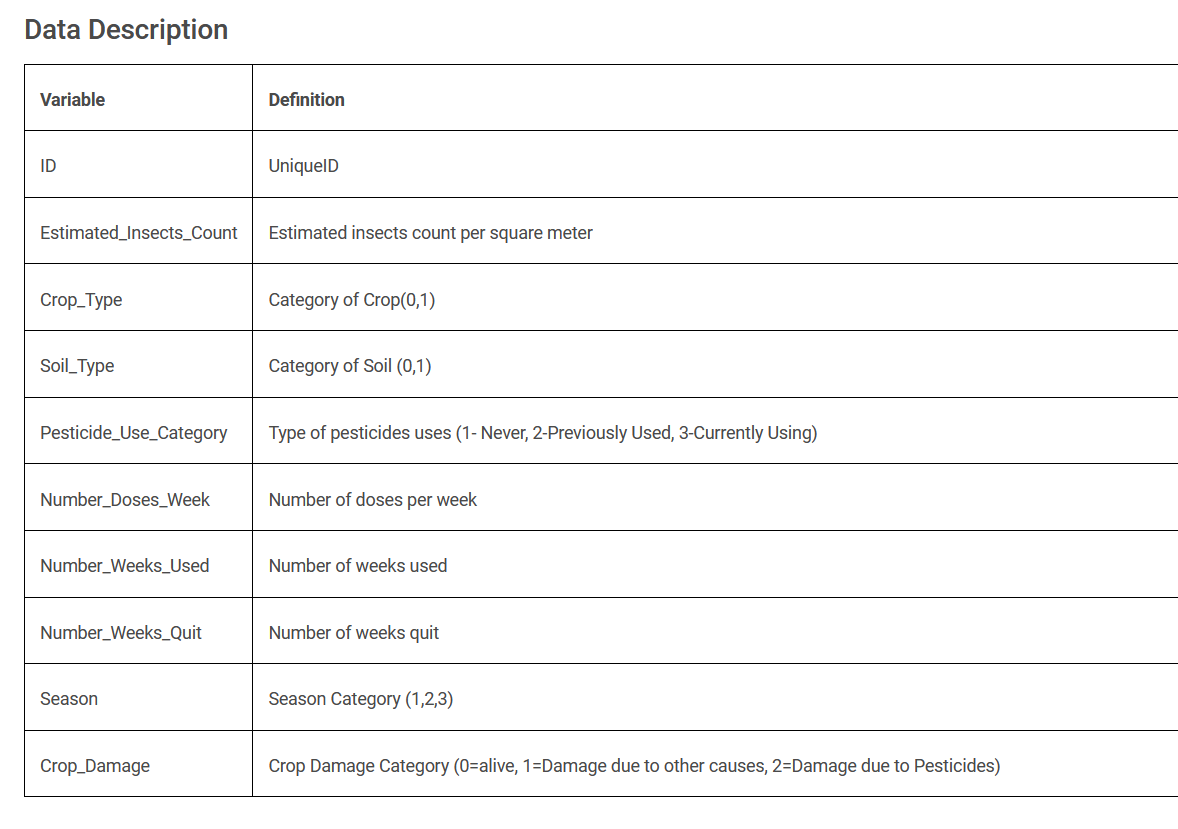

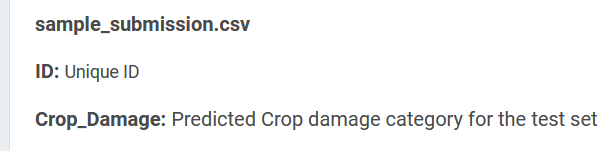

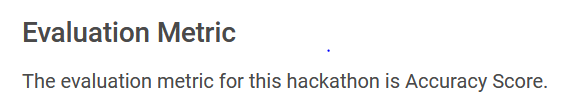

### Import python Packages:

In [303]:


# Import Required Python Packages :

# Scientific and Data Manipulation Libraries :

import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.preprocessing import RobustScaler

# Data Viz & Regular Expression Libraries :

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

# Scikit-Learn ML Libraries :

from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *

# Garbage Collection Libraries :

import gc

# Boosting Algorithm Libraries :

from xgboost                          import XGBClassifier
from catboost                         import CatBoostClassifier
from lightgbm                         import LGBMClassifier
from sklearn.ensemble                 import VotingClassifier



In [304]:
os.chdir('D:/Studies/Data_science/Data_Science_comptetetion/analytics_Vidhya/Machine Learning in Agriculture')

In [305]:
pwd

'D:\\Studies\\Data_science\\Data_Science_comptetetion\\analytics_Vidhya\\Machine Learning in Agriculture'

### Import data from train and test data set:

In [306]:
train= pd.read_csv('Data_set/train_yaOffsB.csv')
test=pd.read_csv('Data_set/test_pFkWwen.csv')

### Perform EDA (Exploratory Data Analysis) - Understanding the Datasets :

In [307]:
# Python Method 1 : Displays Data Information :

def display_data_information(data, data_types, dataframe_name):
    print(" Information of ",dataframe_name,": Rows = ",data.shape[0],"| Columns = ",data.shape[1],"\n")
    data.info()
    print("\n")
    for VARIABLE in data_types :
        data_type = data.select_dtypes(include=[ VARIABLE ]).dtypes
        if len(data_type) > 0 :
            print(str(len(data_type))+" "+VARIABLE+" Features\n"+str(data_type)+"\n"  )     

In [308]:
# Display Data Information of "train and test data" :

data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]
display_data_information(train, data_types, "train")
display_data_information(test, data_types, "test")

 Information of  train : Rows =  88858 | Columns =  10 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


1 float64 Features
Number_Weeks_Used    float64
dtype: object

8 int64 Features
Estimated_Insects_Count    int64
Crop_Type

In [309]:
# Python Method 2 : Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table) :

def display_head_tail(data, head_rows, tail_rows):
    display("Data Head & Tail :")
    display(data.head(head_rows).append(data.tail(tail_rows)))
#     return True






In [310]:
# Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table)
display_head_tail(train, head_rows=3, tail_rows=2)
display_head_tail(test, head_rows=3, tail_rows=2)

'Data Head & Tail :'

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
88856,F00155942,3702,1,0,2,10,25.0,18,3,0
88857,F00155945,3895,1,0,2,20,37.0,7,3,0


'Data Head & Tail :'

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
59308,F00155943,3702,1,0,2,10,28.0,17,2
59309,F00155944,3895,1,0,2,5,52.0,7,1


In [311]:
# Python Method 3 : Displays Data Description using Statistics :

def display_data_description(data, numeric_data_types, categorical_data_types):
    
    print("Data Description :")
    display(data.describe( include = numeric_data_types))
    print("")
    display(data.describe( include = categorical_data_types))

In [312]:
# Display Data Description of "train and test Data"

display_data_description(train, data_types[0:4], data_types[4:7])

display_data_description(test, data_types[0:4], data_types[4:7])

Data Description :


,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


,ID
count,88858
unique,88858
top,F00078018
freq,1


Data Description :


,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,59310.000000,59310.000000,59310.000000,59310.000000,59310.000000,53417.000000,59310.000000,59310.000000
mean,1397.014129,0.287068,0.455117,2.263227,25.851880,28.705094,9.528376,1.900877
std,849.425808,0.452397,0.497986,0.461733,15.481957,12.421211,9.855341,0.701934
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000


,ID
count,59310
unique,59310
top,F00124197
freq,1


In [313]:
 ## Remove Duplicate Rows from Train data if present :
    
def remove_duplicate(data):
    
    print("BEFORE REMOVING DUPLICATES - No. of Rows = ",data.shape[0])
    data.drop_duplicates(keep="first", inplace=True) 
    print("AFTER REMOVING DUPLICATES  - No. of Rows = ",data.shape[0])
    
    return data

In [314]:
# Remove Duplicates from "train and test" data :

train = remove_duplicate(train)
test = remove_duplicate(test)

BEFORE REMOVING DUPLICATES - No. of Rows =  88858
AFTER REMOVING DUPLICATES  - No. of Rows =  88858
BEFORE REMOVING DUPLICATES - No. of Rows =  59310
AFTER REMOVING DUPLICATES  - No. of Rows =  59310


In [315]:
###  Fill/Impute Missing Values Continuous - Mean/Median/Any Specific Value & Categorical - Others/ForwardFill/BackFill :

# Python Method 5 : Fills or Imputes Missing values with Various Methods : 

def fill_missing_values(data, fill_value, fill_types, columns, dataframe_name):
    
    print("Missing Values BEFORE REMOVAL in ",dataframe_name," data")
    display(data.isnull().sum())
    for column in columns :
        
        # Fill Missing Values with Specific Value :
        if "Value_Fill" in fill_types :
            data[ column ] = data[ column ].fillna(fill_value)
#             print("Value_Fill")

        # Fill Missing Values with Forward Fill  (Previous Row Value as Current Row in Table) :
        if "Forward_Fill" in fill_types :
            data[ column ] = data[ column ].ffill(axis = 0)
#             print("Forward_Fill")

        # Fill Missing Values with Backward Fill (Next Row Value as Current Row in Table) :
        if "Backward_Fill" in fill_types :
            data[ column ] = data[ column ].bfill(axis = 0)
#             print("Backward_Fill")
    
    print("Missing Values AFTER REMOVAL in ",dataframe_name," data")
    display(data.isnull().sum())
    
    return data

# Fills or Imputes Missing values in "Number_Weeks_Used" Column with "Mean" Method in "train and test" : 
#train = fill_missing_values(train, fill_value, fill_types, ["Registration_Date"],"train")

In [316]:
display(train.isna().sum())
display(test.isna().sum())

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [317]:
train['Number_Weeks_Used'].fillna(train['Number_Weeks_Used'].mean(), inplace=True)
test['Number_Weeks_Used'].fillna(test['Number_Weeks_Used'].mean(), inplace=True)

In [318]:
display(train.isna().sum())
display(test.isna().sum())

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [319]:
train


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


## Removing Outlier Python code:

In [320]:
def remove_outlier(df_in,col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

### Remove ID Column from both train and test Data:

In [321]:
train.drop(['ID'],axis=1, inplace=True)
test.drop(['ID'],axis=1, inplace=True)

In [322]:
train_target = train['Crop_Damage']

### Remove target variable from train data:

In [323]:
train.drop(['Crop_Damage'],axis=1, inplace=True)

### StandardScaler:

In [324]:
from sklearn import preprocessing
standardscaler=preprocessing.StandardScaler()
train_standardscale=standardscaler.fit_transform(train)
test_standardscale=standardscaler.fit_transform(test)
print(train_standardscale)
print(test_standardscale)

[[-1.42632444  1.58634254 -0.92002085 ... -2.43660084 -0.96862918
  -1.27896183]
 [-1.40159074  1.58634254 -0.92002085 ... -2.43660084 -0.96862918
   0.14692448]
 [-1.34505657  1.58634254 -0.92002085 ... -2.43660084 -0.96862918
   0.14692448]
 ...
 [ 2.49337818  1.58634254 -0.92002085 ...  0.96837874 -0.16059534
   0.14692448]
 [ 2.7124481   1.58634254 -0.92002085 ... -0.3084886   0.84944697
   1.57281078]
 [ 2.93976258  1.58634254 -0.92002085 ...  0.71300527 -0.26159957
   1.57281078]]
[[-1.42334305e+00  1.57591111e+00  1.09418295e+00 ... -3.01387013e-16
  -9.66831737e-01  1.41215588e-01]
 [-1.16198783e+00  1.57591111e+00  1.09418295e+00 ... -2.43513643e+00
  -9.66831737e-01  1.41215588e-01]
 [-9.07696260e-01  1.57591111e+00 -9.13923950e-01 ... -2.43513643e+00
  -9.66831737e-01  1.41215588e-01]
 ...
 [ 2.71360404e+00  1.57591111e+00 -9.13923950e-01 ... -3.01387013e-16
   3.90366474e+00 -1.28343087e+00]
 [ 2.71360404e+00  1.57591111e+00 -9.13923950e-01 ... -5.98151606e-02
   7.58135767

### Robust Scaling:

In [325]:
from sklearn import preprocessing
robustscale=preprocessing.RobustScaler()
train_robustscale=robustscale.fit_transform(train)
test_robustscale=robustscale.fit_transform(test)
print(train_robustscale)
print(test_robustscale)

[[-0.87746358  1.          0.         ... -1.78899813 -0.4375
  -1.        ]
 [-0.85946872  1.          0.         ... -1.78899813 -0.4375
   0.        ]
 [-0.81833762  1.          0.         ... -1.78899813 -0.4375
   0.        ]
 ...
 [ 1.97429306  1.          0.         ...  0.71100187  0.0625
   0.        ]
 [ 2.13367609  1.          0.         ... -0.22649813  0.6875
   1.        ]
 [ 2.29905741  1.          0.         ...  0.52350187  0.
   1.        ]]
[[-0.87746358  1.          1.         ...  0.         -0.4375
   0.        ]
 [-0.68723222  1.          1.         ... -1.79406837 -0.4375
   0.        ]
 [-0.50214225  1.          0.         ... -1.79406837 -0.4375
   0.        ]
 ...
 [ 2.13367609  1.          0.         ...  0.          2.5625
  -1.        ]
 [ 2.13367609  1.          0.         ... -0.04406837  0.625
   0.        ]
 [ 2.29905741  1.          0.         ...  1.45593163  0.
  -1.        ]]


### Train and test split:

In [326]:
#x_train,x_test,y_train,y_test=train_test_split(train_standardscale,train_target,test_size=0.2,random_state=0)
x_train,x_test,y_train,y_test=train_test_split(train_robustscale,train_target,test_size=0.2,random_state=0)

## Apply Machine Learning Model:

### Logistic Regression:

In [327]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [328]:
## Fit the model:

model = LogisticRegression(solver = 'lbfgs')
model.fit(x_train, y_train)

## Validate the fitting:

# use the model to make predictions with the test data
y_pred = model.predict(x_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 2986
Accuracy: 0.83


In [329]:
## Prediction for test data:

y_pred = predictions = model.predict(test_standardscale)

In [330]:
test01=pd.read_csv('Data_set/test_pFkWwen.csv')

In [331]:
#res = pd.DataFrame(y_pred)
#res.index = test01['ID']# its important for comparison
#res.columns = ["Crop_Damage"]
#res.to_csv("D:\Studies\Data_science/Data_Science_comptetetion/analytics_Vidhya/Machine Learning in Agriculture/output/linear_classifier_standardscaler_01.csv")

In [332]:
res = pd.DataFrame(y_pred)
res.index = test01['ID']# its important for comparison
res.columns = ["Crop_Damage"]
res.to_csv("D:\Studies\Data_science/Data_Science_comptetetion/analytics_Vidhya/Machine Learning in Agriculture/output/linear_classifier_robustscaler_01.csv")

In [333]:
train

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,0,1,0,0.0,0,1
1,209,1,0,1,0,0.0,0,2
2,257,1,0,1,0,0.0,0,2
3,257,1,1,1,0,0.0,0,2
4,342,1,0,1,0,0.0,0,2
...,...,...,...,...,...,...,...,...
88853,3337,1,0,2,10,12.0,44,3
88854,3516,1,0,2,10,20.0,38,1
88855,3516,1,0,2,15,40.0,8,2
88856,3702,1,0,2,10,25.0,18,3


## Remove outlier for train data :

In [334]:
train01= pd.read_csv('Data_set/train_yaOffsB.csv')
test01=pd.read_csv('Data_set/test_pFkWwen.csv')

In [335]:
train01=remove_outlier(train01,'Estimated_Insects_Count')
train01

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88851,F00155925,3164,1,0,2,10,11.0,36,1,0
88852,F00155931,3165,1,0,2,60,44.0,15,2,0
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0


In [336]:
train01['Number_Weeks_Used'].fillna(train01['Number_Weeks_Used'].mean(), inplace=True)
test01['Number_Weeks_Used'].fillna(test01['Number_Weeks_Used'].mean(), inplace=True)

In [337]:
train01.drop(['ID'],axis=1, inplace=True)
test01.drop(['ID'],axis=1, inplace=True)
train01_target=train01['Crop_Damage']
train01.drop(['Crop_Damage'],axis=1, inplace=True)



In [338]:
train01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87406 entries, 0 to 88855
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  87406 non-null  int64  
 1   Crop_Type                87406 non-null  int64  
 2   Soil_Type                87406 non-null  int64  
 3   Pesticide_Use_Category   87406 non-null  int64  
 4   Number_Doses_Week        87406 non-null  int64  
 5   Number_Weeks_Used        87406 non-null  float64
 6   Number_Weeks_Quit        87406 non-null  int64  
 7   Season                   87406 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 6.0 MB


In [339]:
test01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  59310 non-null  int64  
 1   Crop_Type                59310 non-null  int64  
 2   Soil_Type                59310 non-null  int64  
 3   Pesticide_Use_Category   59310 non-null  int64  
 4   Number_Doses_Week        59310 non-null  int64  
 5   Number_Weeks_Used        59310 non-null  float64
 6   Number_Weeks_Quit        59310 non-null  int64  
 7   Season                   59310 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 3.6 MB


In [340]:
from sklearn import preprocessing
standardscaler=preprocessing.StandardScaler()
train_standardscale01=standardscaler.fit_transform(train01)
test_standardscale01=standardscaler.fit_transform(test01)
print(train_standardscale01)
print(test_standardscale01)

[[-1.47422602  1.58216513 -0.92181614 ... -2.44971321 -0.96942723
  -1.27874785]
 [-1.44776757  1.58216513 -0.92181614 ... -2.44971321 -0.96942723
   0.14736584]
 [-1.38729113  1.58216513 -0.92181614 ... -2.44971321 -0.96942723
   0.14736584]
 ...
 [ 2.49328074  1.58216513 -0.92181614 ... -1.41754076  3.53523148
   1.57347953]
 [ 2.71880748  1.58216513 -0.92181614 ... -0.72942579  2.92095984
  -1.27874785]
 [ 2.71880748  1.58216513 -0.92181614 ...  0.99086164 -0.15039837
   0.14736584]]
[[-1.42334305e+00  1.57591111e+00  1.09418295e+00 ... -3.01387013e-16
  -9.66831737e-01  1.41215588e-01]
 [-1.16198783e+00  1.57591111e+00  1.09418295e+00 ... -2.43513643e+00
  -9.66831737e-01  1.41215588e-01]
 [-9.07696260e-01  1.57591111e+00 -9.13923950e-01 ... -2.43513643e+00
  -9.66831737e-01  1.41215588e-01]
 ...
 [ 2.71360404e+00  1.57591111e+00 -9.13923950e-01 ... -3.01387013e-16
   3.90366474e+00 -1.28343087e+00]
 [ 2.71360404e+00  1.57591111e+00 -9.13923950e-01 ... -5.98151606e-02
   7.58135767

In [341]:
x_train,x_test,y_train,y_test=train_test_split(train_standardscale01,train01_target,test_size=0.2,random_state=0)
#x_train,x_test,y_train,y_test=train_test_split(train_robustscale01,train_target,test_size=0.2,random_state=0)

In [342]:
## Fit the model:

model = LogisticRegression(solver = 'lbfgs')
model.fit(x_train, y_train)

## Validate the fitting:

# use the model to make predictions with the test data
y_pred = model.predict(x_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 2876
Accuracy: 0.84


In [343]:
## Prediction for test data:

y_pred = model.predict(test_standardscale01)

In [344]:
test02=pd.read_csv('Data_set/test_pFkWwen.csv')

In [345]:
res = pd.DataFrame(y_pred)
res.index = test02['ID']# its important for comparison
res.columns = ["Crop_Damage"]
res.to_csv("D:\Studies\Data_science/Data_Science_comptetetion/analytics_Vidhya/Machine Learning in Agriculture/output/linear_classifier_standardscaler_outlierremoved_01.csv")

### Decision Tree standard Scaler with outlier removed:

In [350]:
train= pd.read_csv('Data_set/train_yaOffsB.csv')
test=pd.read_csv('Data_set/test_pFkWwen.csv')

In [351]:
# Remove Duplicates from "train and test" data :

train = remove_duplicate(train)
test = remove_duplicate(test)

BEFORE REMOVING DUPLICATES - No. of Rows =  88858
AFTER REMOVING DUPLICATES  - No. of Rows =  88858
BEFORE REMOVING DUPLICATES - No. of Rows =  59310
AFTER REMOVING DUPLICATES  - No. of Rows =  59310


In [352]:
##remove outlier for train data:
train=remove_outlier(train,'Estimated_Insects_Count')
train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88851,F00155925,3164,1,0,2,10,11.0,36,1,0
88852,F00155931,3165,1,0,2,60,44.0,15,2,0
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0


In [398]:
train05= pd.read_csv('Data_set/train_yaOffsB.csv')
test05=pd.read_csv('Data_set/test_pFkWwen.csv')

In [402]:
##remove outlier for train data:
train05=remove_outlier(train05,'Estimated_Insects_Count')
train06=remove_outlier(train05,'Number_Weeks_Used')
train07=remove_outlier(train06,'Number_Weeks_Quit')
train07

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88850,F00155923,2999,1,0,2,10,19.0,16,2,1
88851,F00155925,3164,1,0,2,10,11.0,36,1,0
88852,F00155931,3165,1,0,2,60,44.0,15,2,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0


In [353]:
display(train.isna().sum())
display(test.isna().sum())

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          8864
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [354]:
train['Number_Weeks_Used'].fillna(train['Number_Weeks_Used'].mean(), inplace=True)
test['Number_Weeks_Used'].fillna(test['Number_Weeks_Used'].mean(), inplace=True)
display(train.isna().sum())
display(test.isna().sum())

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [355]:
# remove ID from both train and test:

train.drop(['ID'],axis=1, inplace=True)
test.drop(['ID'],axis=1, inplace=True)

train_target = train['Crop_Damage']

train.drop(['Crop_Damage'],axis=1, inplace=True)

In [356]:
## Standard Scaler:

from sklearn import preprocessing
standardscaler=preprocessing.StandardScaler()
train_standardscale=standardscaler.fit_transform(train)
test_standardscale=standardscaler.fit_transform(test)
print(train_standardscale)
print(test_standardscale)

[[-1.47422602  1.58216513 -0.92181614 ... -2.44971321 -0.96942723
  -1.27874785]
 [-1.44776757  1.58216513 -0.92181614 ... -2.44971321 -0.96942723
   0.14736584]
 [-1.38729113  1.58216513 -0.92181614 ... -2.44971321 -0.96942723
   0.14736584]
 ...
 [ 2.49328074  1.58216513 -0.92181614 ... -1.41754076  3.53523148
   1.57347953]
 [ 2.71880748  1.58216513 -0.92181614 ... -0.72942579  2.92095984
  -1.27874785]
 [ 2.71880748  1.58216513 -0.92181614 ...  0.99086164 -0.15039837
   0.14736584]]
[[-1.42334305e+00  1.57591111e+00  1.09418295e+00 ... -3.01387013e-16
  -9.66831737e-01  1.41215588e-01]
 [-1.16198783e+00  1.57591111e+00  1.09418295e+00 ... -2.43513643e+00
  -9.66831737e-01  1.41215588e-01]
 [-9.07696260e-01  1.57591111e+00 -9.13923950e-01 ... -2.43513643e+00
  -9.66831737e-01  1.41215588e-01]
 ...
 [ 2.71360404e+00  1.57591111e+00 -9.13923950e-01 ... -3.01387013e-16
   3.90366474e+00 -1.28343087e+00]
 [ 2.71360404e+00  1.57591111e+00 -9.13923950e-01 ... -5.98151606e-02
   7.58135767

In [357]:
## train and test split:

x_train,x_test,y_train,y_test=train_test_split(train_standardscale,train_target,test_size=0.2,random_state=0)

In [358]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [359]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7518018533348587


 ## Random Forest Classifier:

In [360]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [361]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8278801052511154


In [363]:
test02=pd.read_csv('Data_set/test_pFkWwen.csv')

In [364]:
res = pd.DataFrame(y_pred)
res.index = test02['ID']# its important for comparison
res.columns = ["Crop_Damage"]
res.to_csv("D:\Studies\Data_science/Data_Science_comptetetion/analytics_Vidhya/Machine Learning in Agriculture/output/randomforest_classifier_standardscaler_outlierremoved_01.csv")

### Gradient Boosting:

url followed:
    https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/

In [367]:
from sklearn.ensemble import GradientBoostingClassifier

In [370]:
# evaluate the model
model = GradientBoostingClassifier()
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores = cross_val_score(model, x_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8459558402928726


In [371]:
## Prediction for test data:

y_pred = model.predict(test_standardscale)

In [372]:
res = pd.DataFrame(y_pred)
res.index = test02['ID']# its important for comparison
res.columns = ["Crop_Damage"]
res.to_csv("D:\Studies\Data_science/Data_Science_comptetetion/analytics_Vidhya/Machine Learning in Agriculture/output/gradientboost_classifier_standardscaler_outlierremoved_01.csv")

In [373]:
from sklearn.ensemble import GradientBoostingClassifier

In [374]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

Gradient Boosting Hyperparameters Tuning : Classifier Example

https://www.datasciencelearner.com/gradient-boosting-hyperparameters-tuning/
https://effectiveml.com/using-grid-search-to-optimise-catboost-parameters.html

In [375]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(x_train,y_train)

KeyboardInterrupt: 

In [376]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

## Histogram-Based Gradient Boosting Machine for Classification:

In [379]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [380]:

# evaluate the model
model = HistGradientBoostingClassifier()
# fit the model on the whole dataset
model = HistGradientBoostingClassifier()
model.fit(x_train,y_train)
# make a single prediction
y_pred = model.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8481295046333371


In [381]:
## Prediction for test data:

y_pred = model.predict(test_standardscale)

In [382]:
res = pd.DataFrame(y_pred)
res.index = test02['ID']# its important for comparison
res.columns = ["Crop_Damage"]
res.to_csv("D:\Studies\Data_science/Data_Science_comptetetion/analytics_Vidhya/Machine Learning in Agriculture/output/Histogram_gradientboost_classifier_standardscaler_outlierremoved_01.csv")

### Gradient Boosting With XGBoost:

In [383]:
from sklearn.datasets import make_classification
from xgboost import XGBClassifier

In [384]:
# evaluate the model
model = XGBClassifier()
# fit the model on the whole dataset
model = XGBClassifier()
model.fit(x_train,y_train)
# make a single prediction
y_pred = model.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8481867063265073


In [385]:
## Prediction for test data:

y_pred = model.predict(test_standardscale)

In [386]:
res = pd.DataFrame(y_pred)
res.index = test02['ID']
res.columns = ["Crop_Damage"]
res.to_csv("D:\Studies\Data_science/Data_Science_comptetetion/analytics_Vidhya/Machine Learning in Agriculture/output/xgboost_gradientboost_classifier_standardscaler_outlierremoved_01.csv")

### Gradient Boosting With LightGBM:


In [388]:
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier

In [389]:
# evaluate the model
model = LGBMClassifier()
# fit the model on the whole dataset
model = LGBMClassifier()
model.fit(x_train,y_train)
# make a single prediction
y_pred = model.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8483011097128474


In [391]:
## Prediction for test data:

y_pred = model.predict(test_standardscale)

In [392]:
res = pd.DataFrame(y_pred)
res.index = test02['ID']
res.columns = ["Crop_Damage"]
res.to_csv("D:\Studies\Data_science/Data_Science_comptetetion/analytics_Vidhya/Machine Learning in Agriculture/output/LightGBM_gradientboost_classifier_standardscaler_outlierremoved_01.csv")

## Gradient Boosting with CatBoost:

In [393]:
from sklearn.datasets import make_classification
from catboost import CatBoostClassifier

In [394]:

# evaluate the model
model = CatBoostClassifier()
# fit the model on the whole dataset
model = CatBoostClassifier()
model.fit(x_train,y_train)
# make a single prediction
y_pred = model.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Learning rate set to 0.098265
0:	learn: 0.9803281	total: 138ms	remaining: 2m 17s
1:	learn: 0.8903599	total: 198ms	remaining: 1m 38s
2:	learn: 0.8195305	total: 270ms	remaining: 1m 29s
3:	learn: 0.7618468	total: 337ms	remaining: 1m 23s
4:	learn: 0.7147884	total: 407ms	remaining: 1m 20s
5:	learn: 0.6763212	total: 474ms	remaining: 1m 18s
6:	learn: 0.6424316	total: 546ms	remaining: 1m 17s
7:	learn: 0.6145591	total: 623ms	remaining: 1m 17s
8:	learn: 0.5901910	total: 706ms	remaining: 1m 17s
9:	learn: 0.5692905	total: 789ms	remaining: 1m 18s
10:	learn: 0.5518804	total: 868ms	remaining: 1m 18s
11:	learn: 0.5356244	total: 1.02s	remaining: 1m 23s
12:	learn: 0.5226514	total: 1.12s	remaining: 1m 25s
13:	learn: 0.5108124	total: 1.17s	remaining: 1m 22s
14:	learn: 0.5005078	total: 1.25s	remaining: 1m 21s
15:	learn: 0.4915472	total: 1.32s	remaining: 1m 21s
16:	learn: 0.4833639	total: 1.4s	remaining: 1m 20s
17:	learn: 0.4762714	total: 1.48s	remaining: 1m 20s
18:	learn: 0.4703183	total: 1.55s	remaining: 

160:	learn: 0.4060871	total: 11.1s	remaining: 57.6s
161:	learn: 0.4060502	total: 11.1s	remaining: 57.5s
162:	learn: 0.4059671	total: 11.2s	remaining: 57.4s
163:	learn: 0.4059334	total: 11.2s	remaining: 57.3s
164:	learn: 0.4058307	total: 11.3s	remaining: 57.2s
165:	learn: 0.4057129	total: 11.4s	remaining: 57.1s
166:	learn: 0.4056766	total: 11.4s	remaining: 57s
167:	learn: 0.4056184	total: 11.5s	remaining: 56.8s
168:	learn: 0.4055719	total: 11.5s	remaining: 56.7s
169:	learn: 0.4055135	total: 11.6s	remaining: 56.6s
170:	learn: 0.4054880	total: 11.7s	remaining: 56.5s
171:	learn: 0.4054002	total: 11.7s	remaining: 56.4s
172:	learn: 0.4053470	total: 11.8s	remaining: 56.3s
173:	learn: 0.4052745	total: 11.8s	remaining: 56.2s
174:	learn: 0.4052262	total: 11.9s	remaining: 56.1s
175:	learn: 0.4051341	total: 11.9s	remaining: 55.9s
176:	learn: 0.4050841	total: 12s	remaining: 55.7s
177:	learn: 0.4050501	total: 12s	remaining: 55.6s
178:	learn: 0.4049975	total: 12.1s	remaining: 55.5s
179:	learn: 0.4049

319:	learn: 0.3984171	total: 21.1s	remaining: 44.9s
320:	learn: 0.3983748	total: 21.2s	remaining: 44.8s
321:	learn: 0.3983538	total: 21.3s	remaining: 44.8s
322:	learn: 0.3983360	total: 21.3s	remaining: 44.7s
323:	learn: 0.3982344	total: 21.4s	remaining: 44.7s
324:	learn: 0.3982055	total: 21.5s	remaining: 44.6s
325:	learn: 0.3981543	total: 21.6s	remaining: 44.6s
326:	learn: 0.3981368	total: 21.6s	remaining: 44.5s
327:	learn: 0.3980922	total: 21.7s	remaining: 44.5s
328:	learn: 0.3980382	total: 21.8s	remaining: 44.4s
329:	learn: 0.3980088	total: 21.8s	remaining: 44.3s
330:	learn: 0.3979820	total: 21.9s	remaining: 44.3s
331:	learn: 0.3979413	total: 22s	remaining: 44.2s
332:	learn: 0.3978937	total: 22.1s	remaining: 44.2s
333:	learn: 0.3978551	total: 22.1s	remaining: 44.1s
334:	learn: 0.3978378	total: 22.2s	remaining: 44s
335:	learn: 0.3977827	total: 22.3s	remaining: 44s
336:	learn: 0.3977571	total: 22.3s	remaining: 43.9s
337:	learn: 0.3977089	total: 22.4s	remaining: 43.9s
338:	learn: 0.3976

481:	learn: 0.3927237	total: 32.7s	remaining: 35.2s
482:	learn: 0.3926698	total: 32.8s	remaining: 35.1s
483:	learn: 0.3926355	total: 32.8s	remaining: 35s
484:	learn: 0.3926268	total: 32.9s	remaining: 34.9s
485:	learn: 0.3925927	total: 33s	remaining: 34.9s
486:	learn: 0.3925721	total: 33s	remaining: 34.8s
487:	learn: 0.3925417	total: 33.1s	remaining: 34.7s
488:	learn: 0.3924903	total: 33.2s	remaining: 34.7s
489:	learn: 0.3924577	total: 33.2s	remaining: 34.6s
490:	learn: 0.3924289	total: 33.3s	remaining: 34.5s
491:	learn: 0.3923625	total: 33.4s	remaining: 34.4s
492:	learn: 0.3923450	total: 33.4s	remaining: 34.4s
493:	learn: 0.3923004	total: 33.5s	remaining: 34.3s
494:	learn: 0.3922891	total: 33.5s	remaining: 34.2s
495:	learn: 0.3922277	total: 33.6s	remaining: 34.1s
496:	learn: 0.3922115	total: 33.7s	remaining: 34.1s
497:	learn: 0.3921986	total: 33.7s	remaining: 34s
498:	learn: 0.3921537	total: 33.8s	remaining: 33.9s
499:	learn: 0.3921117	total: 33.8s	remaining: 33.8s
500:	learn: 0.392095

641:	learn: 0.3878558	total: 43.7s	remaining: 24.4s
642:	learn: 0.3878446	total: 43.8s	remaining: 24.3s
643:	learn: 0.3878279	total: 43.8s	remaining: 24.2s
644:	learn: 0.3877995	total: 43.9s	remaining: 24.2s
645:	learn: 0.3877677	total: 44s	remaining: 24.1s
646:	learn: 0.3877300	total: 44.1s	remaining: 24.1s
647:	learn: 0.3877095	total: 44.2s	remaining: 24s
648:	learn: 0.3876675	total: 44.2s	remaining: 23.9s
649:	learn: 0.3876440	total: 44.3s	remaining: 23.9s
650:	learn: 0.3876263	total: 44.4s	remaining: 23.8s
651:	learn: 0.3875957	total: 44.4s	remaining: 23.7s
652:	learn: 0.3875700	total: 44.5s	remaining: 23.6s
653:	learn: 0.3875273	total: 44.5s	remaining: 23.6s
654:	learn: 0.3875027	total: 44.6s	remaining: 23.5s
655:	learn: 0.3874651	total: 44.7s	remaining: 23.4s
656:	learn: 0.3874510	total: 44.8s	remaining: 23.4s
657:	learn: 0.3874400	total: 44.9s	remaining: 23.3s
658:	learn: 0.3873916	total: 44.9s	remaining: 23.3s
659:	learn: 0.3873776	total: 45s	remaining: 23.2s
660:	learn: 0.3873

800:	learn: 0.3837033	total: 54.6s	remaining: 13.6s
801:	learn: 0.3836843	total: 54.6s	remaining: 13.5s
802:	learn: 0.3836437	total: 54.7s	remaining: 13.4s
803:	learn: 0.3836325	total: 54.8s	remaining: 13.4s
804:	learn: 0.3836134	total: 54.8s	remaining: 13.3s
805:	learn: 0.3835944	total: 54.9s	remaining: 13.2s
806:	learn: 0.3835507	total: 55s	remaining: 13.1s
807:	learn: 0.3835054	total: 55s	remaining: 13.1s
808:	learn: 0.3834750	total: 55.1s	remaining: 13s
809:	learn: 0.3834366	total: 55.2s	remaining: 12.9s
810:	learn: 0.3834250	total: 55.2s	remaining: 12.9s
811:	learn: 0.3833935	total: 55.3s	remaining: 12.8s
812:	learn: 0.3833846	total: 55.4s	remaining: 12.7s
813:	learn: 0.3833672	total: 55.5s	remaining: 12.7s
814:	learn: 0.3833252	total: 55.5s	remaining: 12.6s
815:	learn: 0.3833169	total: 55.6s	remaining: 12.5s
816:	learn: 0.3832916	total: 55.7s	remaining: 12.5s
817:	learn: 0.3832703	total: 55.7s	remaining: 12.4s
818:	learn: 0.3832487	total: 55.8s	remaining: 12.3s
819:	learn: 0.3832

961:	learn: 0.3799675	total: 1m 5s	remaining: 2.59s
962:	learn: 0.3799521	total: 1m 5s	remaining: 2.52s
963:	learn: 0.3799258	total: 1m 5s	remaining: 2.45s
964:	learn: 0.3799031	total: 1m 5s	remaining: 2.38s
965:	learn: 0.3798913	total: 1m 5s	remaining: 2.32s
966:	learn: 0.3798633	total: 1m 5s	remaining: 2.25s
967:	learn: 0.3798559	total: 1m 5s	remaining: 2.18s
968:	learn: 0.3798304	total: 1m 6s	remaining: 2.11s
969:	learn: 0.3798209	total: 1m 6s	remaining: 2.04s
970:	learn: 0.3798108	total: 1m 6s	remaining: 1.98s
971:	learn: 0.3797904	total: 1m 6s	remaining: 1.91s
972:	learn: 0.3797634	total: 1m 6s	remaining: 1.84s
973:	learn: 0.3797508	total: 1m 6s	remaining: 1.77s
974:	learn: 0.3797277	total: 1m 6s	remaining: 1.7s
975:	learn: 0.3797184	total: 1m 6s	remaining: 1.63s
976:	learn: 0.3797040	total: 1m 6s	remaining: 1.56s
977:	learn: 0.3796541	total: 1m 6s	remaining: 1.5s
978:	learn: 0.3796221	total: 1m 6s	remaining: 1.43s
979:	learn: 0.3795770	total: 1m 6s	remaining: 1.36s
980:	learn: 0.

In [396]:
## Prediction for test data:

y_pred = model.predict(test_standardscale)

In [397]:
res = pd.DataFrame(y_pred)
res.index = test02['ID']
res.columns = ["Crop_Damage"]
res.to_csv("D:\Studies\Data_science/Data_Science_comptetetion/analytics_Vidhya/Machine Learning in Agriculture/output/catboost_classifier_standardscaler_outlierremoved_01.csv")

## outlier removed for train data for all columns:

In [404]:
train10= pd.read_csv('Data_set/train_yaOffsB.csv')
test10=pd.read_csv('Data_set/test_pFkWwen.csv')


In [405]:
train10

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [406]:
##remove outlier for train data:
train10=remove_outlier(train10,'Estimated_Insects_Count')
train10=remove_outlier(train10,'Number_Doses_Week')
train10=remove_outlier(train10,'Number_Weeks_Used')
train10=remove_outlier(train10,'Number_Weeks_Quit')
train10

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88850,F00155923,2999,1,0,2,10,19.0,16,2,1
88851,F00155925,3164,1,0,2,10,11.0,36,1,0
88852,F00155931,3165,1,0,2,60,44.0,15,2,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0


In [413]:
train10['Number_Weeks_Used'].fillna(train10['Number_Weeks_Used'].mean(), inplace=True)
test10['Number_Weeks_Used'].fillna(test10['Number_Weeks_Used'].mean(), inplace=True)
train10.isna().sum()
test10.isna().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [414]:
# remove ID from both train and test:

train10.drop(['ID'],axis=1, inplace=True)
test10.drop(['ID'],axis=1, inplace=True)

train_target10 = train10['Crop_Damage']

train10.drop(['Crop_Damage'],axis=1, inplace=True)


In [416]:
## Standard Scaler:

from sklearn import preprocessing
standardscaler=preprocessing.StandardScaler()
train10_standardscale=standardscaler.fit_transform(train10)
test10_standardscale=standardscaler.fit_transform(test10)
print(train10_standardscale)
print(test10_standardscale)

[[-1.47773219  1.57266589 -0.92250418 ... -2.3329507  -0.9764482
  -1.27768703]
 [-1.45106097  1.57266589 -0.92250418 ... -2.3329507  -0.9764482
   0.14803965]
 [-1.39009818  1.57266589 -0.92250418 ... -2.3329507  -0.9764482
   0.14803965]
 ...
 [ 2.30323089  1.57266589 -0.92250418 ...  1.27106705  0.59119364
   0.14803965]
 [ 2.7490213   1.57266589 -0.92250418 ... -0.69476081  2.99491112
  -1.27768703]
 [ 2.7490213   1.57266589 -0.92250418 ...  0.94342907 -0.14037256
   0.14803965]]
[[-1.42334305e+00  1.57591111e+00  1.09418295e+00 ... -3.01387013e-16
  -9.66831737e-01  1.41215588e-01]
 [-1.16198783e+00  1.57591111e+00  1.09418295e+00 ... -2.43513643e+00
  -9.66831737e-01  1.41215588e-01]
 [-9.07696260e-01  1.57591111e+00 -9.13923950e-01 ... -2.43513643e+00
  -9.66831737e-01  1.41215588e-01]
 ...
 [ 2.71360404e+00  1.57591111e+00 -9.13923950e-01 ... -3.01387013e-16
   3.90366474e+00 -1.28343087e+00]
 [ 2.71360404e+00  1.57591111e+00 -9.13923950e-01 ... -5.98151606e-02
   7.58135767e-0

In [418]:
## train and test split:

x_train,x_test,y_train,y_test=train_test_split(train10_standardscale,train_target10,test_size=0.2,random_state=0)

In [419]:
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier

In [420]:
# evaluate the model
model = LGBMClassifier()
# fit the model on the whole dataset
model = LGBMClassifier()
model.fit(x_train,y_train)
# make a single prediction
y_pred = model.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8518829532975906


In [421]:
## Prediction for test data:

y_pred = model.predict(test10_standardscale)

In [422]:
res = pd.DataFrame(y_pred)
res.index = test02['ID']
res.columns = ["Crop_Damage"]
res.to_csv("D:\Studies\Data_science/Data_Science_comptetetion/analytics_Vidhya/Machine Learning in Agriculture/output/LightGBM_gradientboost_classifier_standardscaler_outlierremoved_allcolumn_02.csv")

### outlier removed for train data for all columns Histogram classifier:

In [430]:
# evaluate the model
model = HistGradientBoostingClassifier()
# fit the model on the whole dataset
model = HistGradientBoostingClassifier()
model.fit(x_train,y_train)
# make a single prediction
y_pred = model.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8512370001937859


In [425]:
## Prediction for test data:

y_pred = model.predict(test10_standardscale)

In [426]:
res = pd.DataFrame(y_pred)
res.index = test02['ID']# its important for comparison
res.columns = ["Crop_Damage"]
res.to_csv("D:\Studies\Data_science/Data_Science_comptetetion/analytics_Vidhya/Machine Learning in Agriculture/output/Histogram_gradientboost_classifier_standardscaler_outlierremoved_allcolumns_02.csv")

Results:

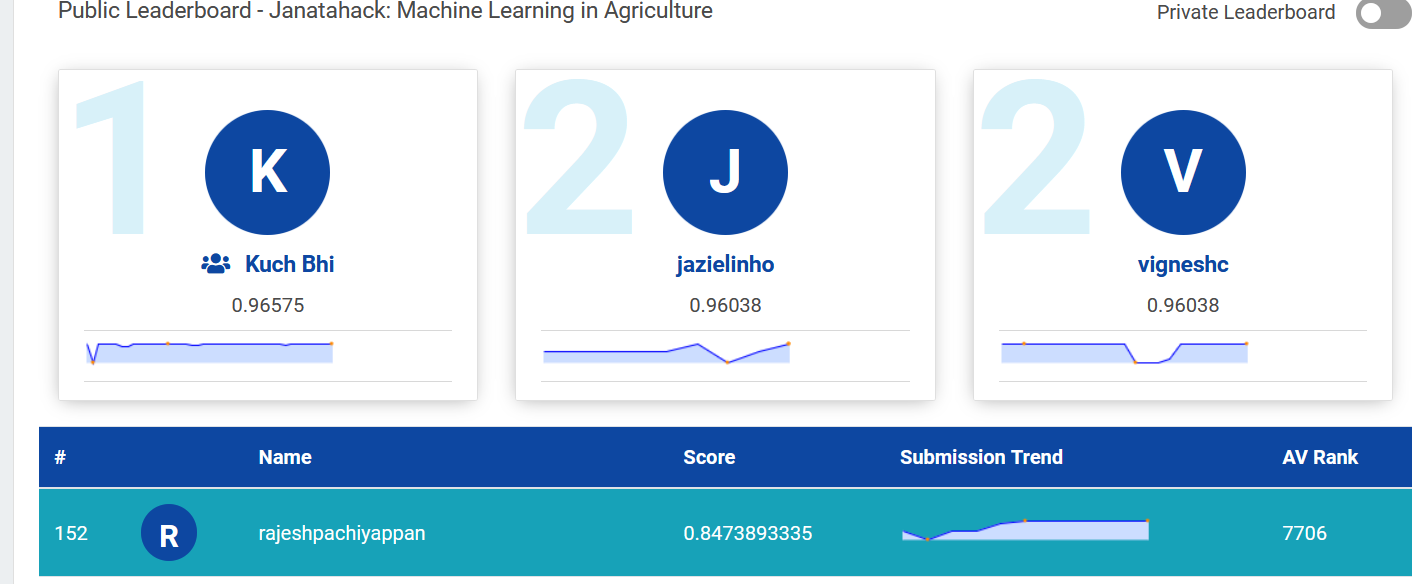

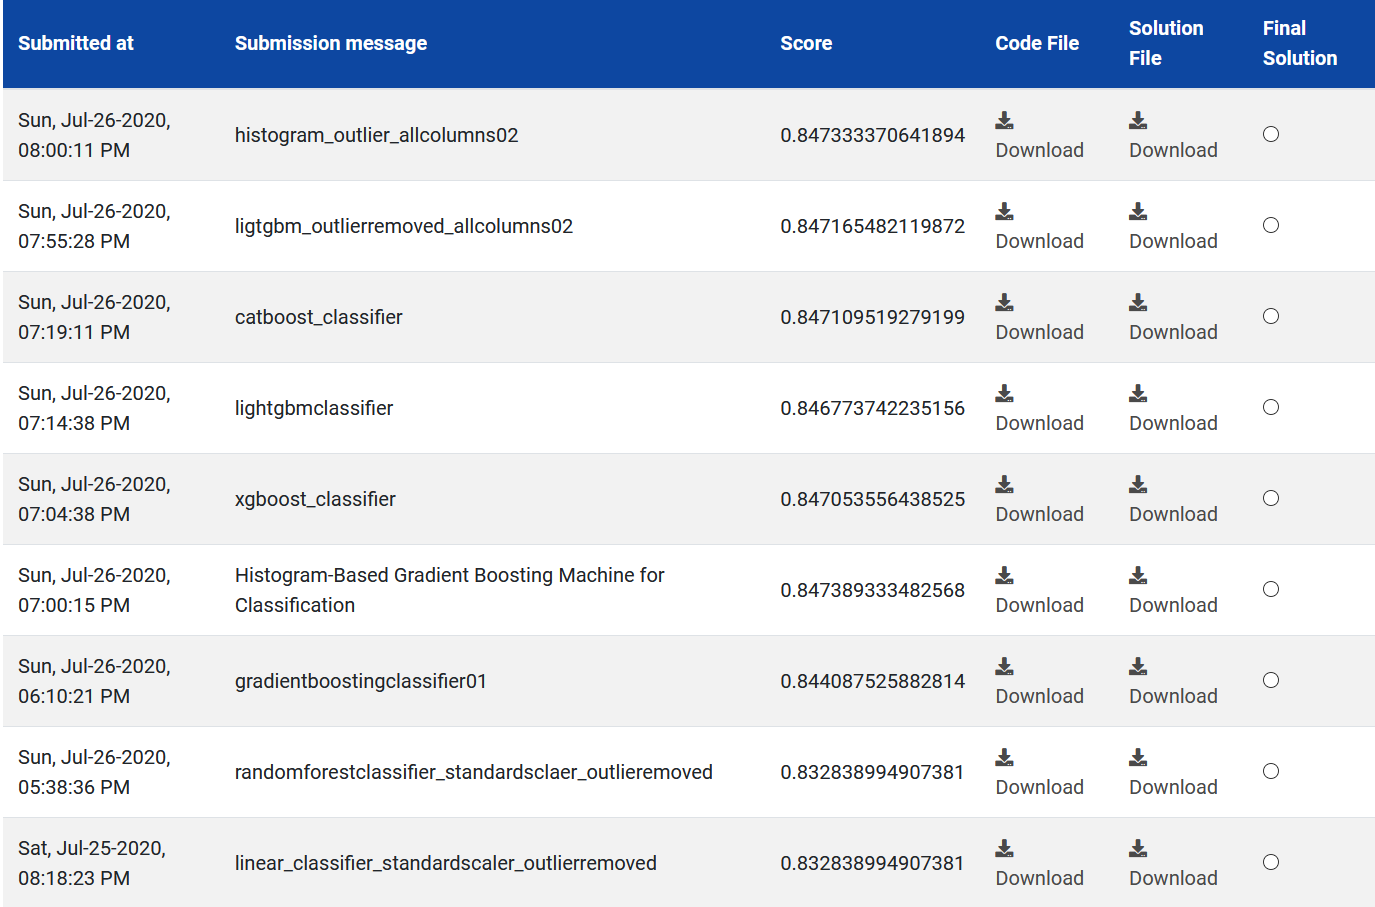